# Redes Neuronales en Keras

In [1]:
pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/e9/6b/a4b872afe267184051a716aae58f1f9d8ebb456ecce7edece70a07c15f56/tensorflow-2.8.0-cp38-cp38-macosx_10_14_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bc/19/404708a7e54ad2798907210462fd950c3442ea51acc8790f3da48d2bee8b/opt_einsum-3.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/34/af/4b3cdb20ac3ee72ad9ed528c8653dbd1cee029f23e44209def0703119270/protobuf-3.19.4-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5f/1c/b59500a88c5c3d9d601c5ca62b9df5e0964764472faed82a182958a922c5/gast-0.5.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/p

In [27]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Redes neuronales en Keras/nba.csv', index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [5]:
# borrar faltantes
df.dropna(inplace=True)
# Guardar X datos
X = df.drop(columns = 'TARGET_5Yrs')
# Codificar nuestro objetivo
y = df['TARGET_5Yrs']

In [6]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [7]:
# Escalar nuestros datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Paso 1: Definir la estructura de nuestra red

Lo primero que tenemos que definir es cuántas características tenemos en nuestros datos X.

In [8]:
# Paso 1: Definir nuestra estructura de red
# Guardar la cantidad de características que tenemos como nuestra forma de entrada
input_shape = X_train.shape[1]
input_shape

19

Luego, podemos definir el tipo de nuestro modelo. Utilizaremos un modelo secuencial. Esto significa que las capas del modelo se ejecutan de manera secuencial. Este es un tipo de modelo muy común utilizado en Keras.

In [9]:
# Modelo secuencial
model = Sequential()

2022-03-25 16:31:57.841270: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


¡Ahora podemos agregar nuestras capas ocultas!  Vamos a usar dos capas ocultas en este ejemplo pero, en realidad, puedes usar la cantidad que quieras. Sin embargo, ten cuidado de agregar muchas capas ocultas, ya que aumenta la complejidad, amplía la naturaleza de la caja negra y puede llevar a un sobreajuste.

Hay muchos tipos de capas en Keras, y estas se refieren al tipo de red neuronal que estamos ajustando. La capa más común es la capa densa, que significa que la red está conectada completamente.

Dentro de una capa densa, necesitamos especificar el número de neuronas que queremos en la capa y el tipo de función de activación que queremos usar. El número de neuronas en cada capa depende de ti. Como regla del pulgar, usa “menor que” o “igual al” número de características que tienes, y disminuye el número de neuronas a medida que atraviesas la red. Dentro de las capas ocultas, es común usar la función ReLU, ya que tiende a tener un buen desempeño.

In [10]:
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de las características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
# Segunda capa oculta
model.add(Dense(10, # Cuántas neuronas tienes en tu segunda capa oculta
                activation = 'relu')) # ¿Qué función de activación estás usando?

Después, necesitamos agregar la capa de salida. La capa de salida necesita tener el número de nodos que quieres dentro de la capa (Regularmente, es 1. Pero pueden ser más para clasificación multiclase) y la función de activación para la tarea específica. La función de activación determina el rango de valores que la capa de salida puede y debe contener.

Para problemas de regresión, queremos usar la función de activación linear.

Para problemas de clasificación, queremos usar la función de activación de Sigmoid.

In [11]:
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

### Paso 2: Compilar el modelo

Al compilar el modelo, necesitamos especificar cuál función de pérdida estamos usando y qué optimizador usaremos para el ajuste. Un optimizador común que elegir es el optimizador Adam.

Para problemas de regresión, queremos usar una función de pérdida como la MSE.

Para problemas de clasificación binaria como este, queremos ocupar la pérdida de entropía cruzada binaria. Esto se puede abreviar como “bce” en Keras.

Para problemas de clasificación multiclase, usaremos entropía cruzada categórica. 

In [12]:
# Paso 2: compilar
model.compile(loss = 'bce', optimizer = 'adam')

### Paso 3: Ajustar el modelo

¡Finalmente, podemos ajustar nuestro modelo para entrenar nuestros datos! De forma usual, guardamos el proceso de ajuste para poder visualizar la pérdida a través del tiempo.

In [13]:
# Paso 3: ajusta nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 28ms/step - loss: 0.6415 - val_loss: 0.6132
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6130 - val_loss: 0.5979
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6005 - val_loss: 0.5892
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5911 - val_loss: 0.5836
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 0.5833 - val_loss: 0.5781
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.5756 - val_loss: 0.5740
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5704 - val_loss: 0.5703
Epoch 8/10
32/32 [==============================] - 0s 8ms/step - loss: 0.5656 - val_loss: 0.5685
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5619 - val_loss: 0.5673
Epoch 10/10
32/32 [==============================] - 0s 6ms/step - loss: 0.5597 - val_loss: 0.5654


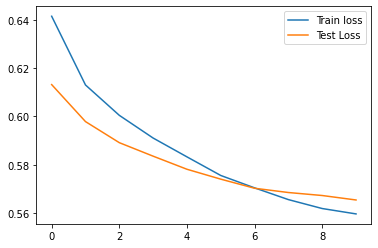

In [14]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

Podemos ver que, al incrementar el número de epochs para el que entrenamos nuestro modelo, ¡la pérdida de tren y de validación disminuye! Esto es exactamente lo que queremos, porque queremos que la pérdida sea lo más baja posible. En la realidad, ejecutaríamos nuestro modelo en muchos más que 10 epochs.

### Crea una red neuronal prealimentada

In [21]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [22]:
# Escalar nuestros datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Paso 1: Definir nuestra estructura de red
# Guarde la cantidad de características que tenemos como nuestra forma de entrada
input_shape = X_train.shape[1]
input_shape

19

In [24]:
# Sin dilución
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6469 - val_loss: 0.6124
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6102 - val_loss: 0.5937
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5979 - val_loss: 0.5839
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5904 - val_loss: 0.5774
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5845 - val_loss: 0.5698
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5781 - val_loss: 0.5687
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5733 - val_loss: 0.5674
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5688 - val_loss: 0.5642
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5647 - val_loss: 0.5612
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5610 - val_loss: 0.5602
Epoch 11/

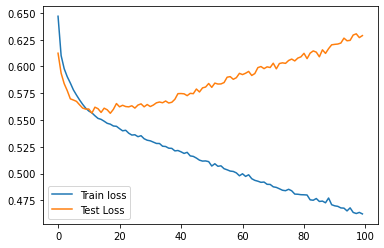

In [25]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

¡Rayos! Nuestro modelo está súper sobreajustado.  Nota que la pérdida de entrenamiento continúa disminuyendo mientras la pérdida de prueba comienza a aumentar a medida que incrementamos el número de epochs para el que entrenamos nuestro modelo. Este es un problema súper común en redes neuronales, y nos dice que nuestro modelo está sobreajustado y no está desempeñándose bien en datos no vistos.


### Creemos el mismo modelo con dilución para intentar prevenir un sobreajuste. 

La dilución en Keras está codificada como otra capa. Después de la capa, podrás diluir. También, tienes que especificar la probabilidad de dilución (la probabilidad de que cada neurona individual tenga que abandonar el entrenamiento en ese epoch).

In [28]:
# Con dilución
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dropout(.2))
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6840 - val_loss: 0.6099
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6392 - val_loss: 0.5877
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6338 - val_loss: 0.5851
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6133 - val_loss: 0.5774
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6200 - val_loss: 0.5750
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6077 - val_loss: 0.5703
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.5681
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5902 - val_loss: 0.5681
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5995 - val_loss: 0.5675
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5933 - val_loss: 0.5660
Epoch 11/

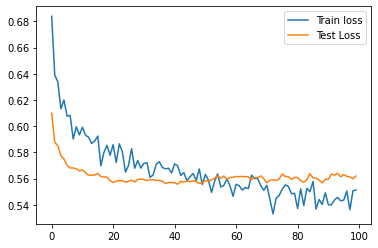

In [29]:
# Visualizar la perdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

### Detención anticipada en Keras
¡Intentemos hacer esto en Keras! Veremos una red neuronal con y sin detención anticipada.

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
# Paso 1: Definir nuestra estructura de red
# Guardar la cantidad de características que tenemos como nuestra forma de entrada
input_shape = X_train.shape[1]
input_shape

19

In [32]:
# Sin detención anticipada
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 51ms/step - loss: 0.6312 - val_loss: 0.5855
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.6036 - val_loss: 0.5744
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5951 - val_loss: 0.5687
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.5878 - val_loss: 0.5647
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5801 - val_loss: 0.5631
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5758 - val_loss: 0.5629
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5715 - val_loss: 0.5639
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5690 - val_loss: 0.5621
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5671 - val_loss: 0.5604
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5640 - val_loss: 0.5614
Epoch 11

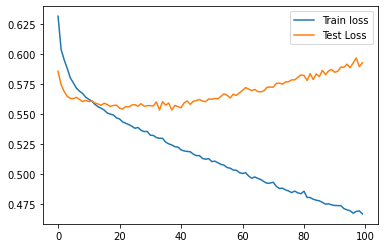

In [33]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [37]:
# Con detención anticipada
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 5)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6671 - val_loss: 0.6270
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6055
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5985 - val_loss: 0.5950
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5896 - val_loss: 0.5906
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5813 - val_loss: 0.5885
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5757 - val_loss: 0.5841
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5712 - val_loss: 0.5796
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 0.5675 - val_loss: 0.5812
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5642 - val_loss: 0.5794
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.5612 - val_loss: 0.5781
Epoch 11/

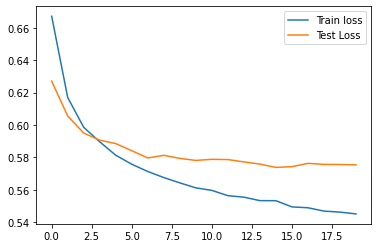

In [38]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();